# Linear Regression with the mpg dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = sns.load_dataset('mpg')
df.shape

(398, 9)

In [4]:
df.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [5]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [6]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


In [7]:
Xarray = df['horsepower'].values
Yarray = df['weight'].values

In [8]:
type(Xarray)

numpy.ndarray

In [9]:
Xarray

array([130.        , 165.        , 150.        , 150.        ,
       140.        , 198.        , 220.        , 215.        ,
       225.        , 190.        , 170.        , 160.        ,
       150.        , 225.        ,  95.        ,  95.        ,
        97.        ,  85.        ,  88.        ,  46.        ,
        87.        ,  90.        ,  95.        , 113.        ,
        90.        , 215.        , 200.        , 210.        ,
       193.        ,  88.        ,  90.        ,  95.        ,
       104.46938776, 100.        , 105.        , 100.        ,
        88.        , 100.        , 165.        , 175.        ,
       153.        , 150.        , 180.        , 170.        ,
       175.        , 110.        ,  72.        , 100.        ,
        88.        ,  86.        ,  90.        ,  70.        ,
        76.        ,  65.        ,  69.        ,  60.        ,
        70.        ,  95.        ,  80.        ,  54.        ,
        90.        ,  86.        , 165.        , 175.  

In [10]:
X = Xarray.reshape(-1, 2)
print(X.shape)
X

(199, 2)


array([[130.        , 165.        ],
       [150.        , 150.        ],
       [140.        , 198.        ],
       [220.        , 215.        ],
       [225.        , 190.        ],
       [170.        , 160.        ],
       [150.        , 225.        ],
       [ 95.        ,  95.        ],
       [ 97.        ,  85.        ],
       [ 88.        ,  46.        ],
       [ 87.        ,  90.        ],
       [ 95.        , 113.        ],
       [ 90.        , 215.        ],
       [200.        , 210.        ],
       [193.        ,  88.        ],
       [ 90.        ,  95.        ],
       [104.46938776, 100.        ],
       [105.        , 100.        ],
       [ 88.        , 100.        ],
       [165.        , 175.        ],
       [153.        , 150.        ],
       [180.        , 170.        ],
       [175.        , 110.        ],
       [ 72.        , 100.        ],
       [ 88.        ,  86.        ],
       [ 90.        ,  70.        ],
       [ 76.        ,  65.        ],
 

In [11]:
X = Xarray.reshape(-1, 1)
Y = Yarray.reshape(-1, 1)

In [12]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(model1.intercept_)
print(model1.coef_)

[977.34076621]
[[19.07816155]]


In [14]:
Y_pred = model1.predict(X)

In [15]:
Y_pred

array([[3457.50176806],
       [4125.23742241],
       [3839.06499912],
       [3839.06499912],
       [3648.28338359],
       [4754.81675365],
       [5174.53630781],
       [5079.14550004],
       [5269.92711557],
       [4602.19146122],
       [4220.62823017],
       [4029.84661464],
       [3839.06499912],
       [5269.92711557],
       [2789.76611372],
       [2789.76611372],
       [2827.92243682],
       [2598.98449819],
       [2656.21898285],
       [1854.93619764],
       [2637.1408213 ],
       [2694.37530596],
       [2789.76611372],
       [3133.17302167],
       [2694.37530596],
       [5079.14550004],
       [4792.97307675],
       [4983.75469228],
       [4659.42594588],
       [2656.21898285],
       [2694.37530596],
       [2789.76611372],
       [2970.42462312],
       [2885.15692148],
       [2980.54772925],
       [2885.15692148],
       [2656.21898285],
       [2885.15692148],
       [4125.23742241],
       [4316.01903793],
       [3896.29948378],
       [3839.064

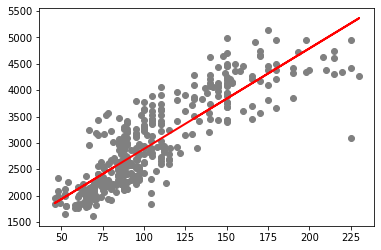

In [16]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

# Need to split dataset into Training and Testing set

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.8 * df.shape[0])

(318, 1)
(80, 1)
(318, 1)
(80, 1)
318.40000000000003


In [19]:
model2 = LinearRegression()
model2.fit(X_train, Y_train)
print(model2.intercept_)
print(model2.coef_)

[942.42861007]
[[19.48576276]]


**Compare with model1**

In [20]:
print(model1.intercept_)
print(model1.coef_)

[977.34076621]
[[19.07816155]]


In [21]:
Y_pred = model2.predict(X_test)

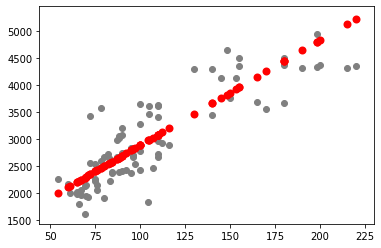

In [22]:
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

# Now check model performance

In [23]:
from sklearn import metrics

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 368.1337619437148
Mean Squared Error: 201176.0818221282
Root Mean Squared Error: 448.52656757669126
R-squared: 0.7232751145017162


## Pick another training set and build another model

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(0.6 * df.shape[0])

(238, 1)
(160, 1)
(238, 1)
(160, 1)
238.79999999999998


In [26]:
model3 = LinearRegression()
model3.fit(X_train, Y_train)
print(model3.intercept_)
print(model3.coef_)

[885.63517611]
[[20.05543059]]


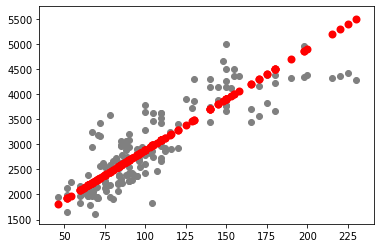

In [27]:
Y_pred = model3.predict(X_test)
plt.scatter(X_test, Y_test,  color='gray')
plt.scatter(X_test, Y_pred, color='red', linewidth=2)
plt.show()

In [28]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

Mean Absolute Error: 343.7676698648614
Mean Squared Error: 188633.05036591884
Root Mean Squared Error: 434.3190651651374
R-squared: 0.7285281245558992


## Note that the RMSE changes. If the RMSE is still good when we pick various training set, it means model passes (one of the ) model validation test.

## how are we going to do this automatically?

## Idea is to pick random testing set, and display the model performance metric.  First we need some random number

In [29]:
import random
for i in range(10):
    print(random.randint(1, 1000))

776
21
267
801
160
947
782
331
950
407


## Now we can use different random_state value in the train_test_split so that it will generate different training set

In [30]:
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))
    #plt.scatter(X_test, Y_test,  color='gray')
    #plt.scatter(X_test, Y_pred, color='red', linewidth=2)
    #plt.show()

Trial 0, R-squared: 0.7482890409766014,  Slope: [[19.77025725]], Intercept: [916.48340706],  
Trial 1, R-squared: 0.7782647098251865,  Slope: [[18.60090302]], Intercept: [1013.12263123],  
Trial 2, R-squared: 0.7612535224776731,  Slope: [[18.58701704]], Intercept: [1036.25456181],  
Trial 3, R-squared: 0.7498962365012933,  Slope: [[18.40261115]], Intercept: [1053.99588442],  
Trial 4, R-squared: 0.5893325878847432,  Slope: [[19.84843106]], Intercept: [915.70079254],  
Trial 5, R-squared: 0.7125358583492855,  Slope: [[19.17963063]], Intercept: [960.61729206],  
Trial 6, R-squared: 0.699335973059319,  Slope: [[19.62494196]], Intercept: [934.5616355],  
Trial 7, R-squared: 0.7351052080656115,  Slope: [[19.24470348]], Intercept: [967.67681839],  
Trial 8, R-squared: 0.769202212929678,  Slope: [[18.79664051]], Intercept: [1014.77678031],  
Trial 9, R-squared: 0.7457846920500217,  Slope: [[19.2224289]], Intercept: [955.1287826],  


## Collect the R-squared and plot it

In [30]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf

,trial,Rsquare
0,0,0.723800
1,1,0.771438
2,2,0.763198
3,3,0.780844
4,4,0.683479
5,5,0.766308
6,6,0.744655
7,7,0.680372
8,8,0.773008
9,9,0.793346


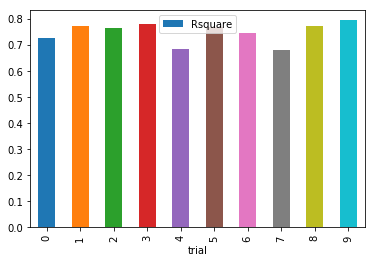

In [31]:
rdf.plot.bar(x='trial', y='Rsquare')

In [32]:
print(rdf['Rsquare'].mean())

0.7480448479939935


# The above concept of re-running the same model but with different training set drawn from the data set is called Cross-Validation

# We have just did a 10-fold Cross Validation

# Now Add a second variable, say, the horsepower

In [33]:
X = df[['weight','horsepower']].values.reshape(-1, 2)
Y = df['mpg'].values.reshape(-1, 1)
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(318, 2) (80, 2)
(318, 1) (80, 1)


In [34]:
X

array([[3504.        ,  130.        ],
       [3693.        ,  165.        ],
       [3436.        ,  150.        ],
       [3433.        ,  150.        ],
       [3449.        ,  140.        ],
       [4341.        ,  198.        ],
       [4354.        ,  220.        ],
       [4312.        ,  215.        ],
       [4425.        ,  225.        ],
       [3850.        ,  190.        ],
       [3563.        ,  170.        ],
       [3609.        ,  160.        ],
       [3761.        ,  150.        ],
       [3086.        ,  225.        ],
       [2372.        ,   95.        ],
       [2833.        ,   95.        ],
       [2774.        ,   97.        ],
       [2587.        ,   85.        ],
       [2130.        ,   88.        ],
       [1835.        ,   46.        ],
       [2672.        ,   87.        ],
       [2430.        ,   90.        ],
       [2375.        ,   95.        ],
       [2234.        ,  113.        ],
       [2648.        ,   90.        ],
       [4615.        ,  2

In [35]:
df[['weight', 'horsepower']].head()

,weight,horsepower
0,3504,130.0
1,3693,165.0
2,3436,150.0
3,3433,150.0
4,3449,140.0


In [36]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(model.coef_)
print(model.intercept_)

[[-0.00521591 -0.06185685]]
[45.44711105]


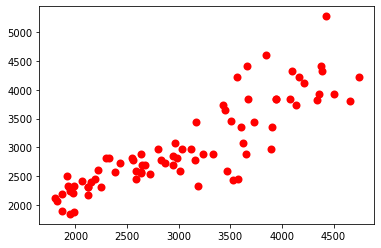

In [33]:

plt.scatter(Y_test, Y_pred, color='red', linewidth=2)
plt.show()

In [38]:
print('R-squared:', metrics.r2_score(Y_test, Y_pred))

R-squared: 0.7030552754471302


In [39]:
# Do a 10-fold cross validation again with two variable

Trial 0, R-squared: 0.7394788901433109,  Slope: [[-0.00589103 -0.04695723]], Intercept: [45.87146109],  
Trial 1, R-squared: 0.7030022961282528,  Slope: [[-0.00581111 -0.05081401]], Intercept: [45.96307329],  
Trial 2, R-squared: 0.6810752276995626,  Slope: [[-0.00582756 -0.0454195 ]], Intercept: [45.64411764],  
Trial 3, R-squared: 0.7720739541546723,  Slope: [[-0.00572728 -0.04634417]], Intercept: [45.28706059],  
Trial 4, R-squared: 0.6901942972297512,  Slope: [[-0.006063   -0.04328103]], Intercept: [46.10922243],  
Trial 5, R-squared: 0.743607034267757,  Slope: [[-0.00613194 -0.03902896]], Intercept: [45.80033424],  
Trial 6, R-squared: 0.6985628470342096,  Slope: [[-0.00611105 -0.04303764]], Intercept: [46.28032798],  
Trial 7, R-squared: 0.7601648112754598,  Slope: [[-0.00631528 -0.03423465]], Intercept: [45.8063684],  
Trial 8, R-squared: 0.6229038216256992,  Slope: [[-0.00627284 -0.0395287 ]], Intercept: [46.45763961],  
Trial 9, R-squared: 0.7675256934943115,  Slope: [[-0.0058

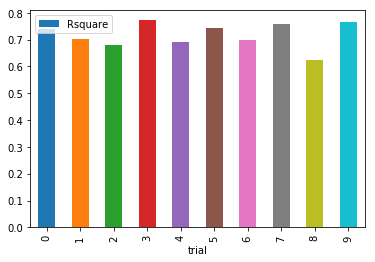

In [40]:
rsquare = []
for i in range(10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = random.randint(1,1000))
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    rsquare.append(metrics.r2_score(Y_test, Y_pred))
    print('Trial {}, R-squared: {},  Slope: {}, Intercept: {},  '.format(i, metrics.r2_score(Y_test, Y_pred), \
                                                                      model.coef_, model.intercept_))

    
rdf = pd.DataFrame( {'trial': range(10), 'Rsquare': rsquare})
rdf.plot.bar(x='trial', y='Rsquare')

In [41]:
print(rdf['Rsquare'].mean())

0.7178588873052987
